[View in Colaboratory](https://colab.research.google.com/github/jpskycak/research_notebooks/blob/master/programmable_self_assembly_into_non_simply_connected_shapes.ipynb)

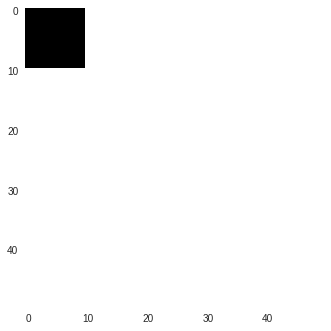

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import uuid

# initial coordinates for agents
L = 10
gridshape = (5*L,5*L)
grid = np.zeros(gridshape)
grid[:L,:L] = 1
plt.imshow(grid)
plt.grid(False)
plt.show()

In [36]:
# instantiate agents at initial coordinates
# initialize estimated coordinates as true initial coordinates
# compute_neighbors_and_distances()

agents = [{'true_coordinates':(x,y),'estimated_coordinates':(x,y),'id':str(uuid.uuid4())} for x in range(gridshape[0]) for y in range(gridshape[1]) if grid[x,y]==1]

def distance_metric(a,b):
  return max(abs(a[0]-b[0]),abs(a[1]-b[1]))

def in_radius(test_point,center,radius):
  out = False
  if distance_metric(test_point,center) <= radius:
    out = True
  return out

def get_neighbors_and_distances(agent,radius=3):
  center = agent['true_coordinates']
  neighbors = [i for i,a in enumerate(agents) if in_radius(a['true_coordinates'],center,radius) and a['id'] != agent['id']]
  distances = [distance_metric(agents[i]['true_coordinates'],center) for i in neighbors]
  return [neighbors,distances]

def compute_neighbors_and_distances():
  for a in agents:
    [neighbors,distances] = get_neighbors_and_distances(a)
    a['neighbors'] = neighbors
    a['distances'] = distances


compute_neighbors_and_distances()
  
agents[0]

{'distances': [1, 2, 3, 1, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3],
 'estimated_coordinates': (0, 0),
 'id': '3cd8ceea-33e3-4e75-a063-67f067ddb9ab',
 'neighbors': [1, 2, 3, 10, 11, 12, 13, 20, 21, 22, 23, 30, 31, 32, 33],
 'true_coordinates': (0, 0)}

In [37]:
# initialize gradient values. source agent is at (L-1,L-1)

for a in agents:
  if a['true_coordinates'] == (L-1,L-1):
    a['gradient_value'] = 0
    for neighbor_index in a['neighbors']:
      neighbor = agents[neighbor_index]
      neighbor['gradient_value'] = 1
      
def do_all_agents_have_gradient_values():
  ans = True
  for a in agents:
    if 'gradient_value' not in a.keys():
      ans = False
  return ans

while not do_all_agents_have_gradient_values():
  for a in agents:
    if 'gradient_value' not in a.keys():
      neighbors = [agents[i] for i in a['neighbors']]
      min_gradient_in_neighbors = 9*10**10
      should_assign_gradient_value = False
      for neighbor in neighbors:
        if 'gradient_value' in neighbor.keys():
          min_gradient_in_neighbors = min(neighbor['gradient_value'],min_gradient_in_neighbors)
          should_assign_gradient_value = True
      if should_assign_gradient_value:
        a['gradient_value'] = 1+min_gradient_in_neighbors
  
agents[0]

{'distances': [1, 2, 3, 1, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3],
 'estimated_coordinates': (0, 0),
 'gradient_value': 3,
 'id': '3cd8ceea-33e3-4e75-a063-67f067ddb9ab',
 'neighbors': [1, 2, 3, 10, 11, 12, 13, 20, 21, 22, 23, 30, 31, 32, 33],
 'true_coordinates': (0, 0)}

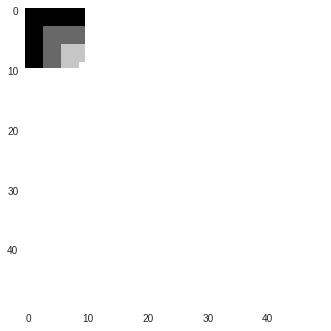

In [39]:
# check gradient
gradient = np.zeros(gridshape)
for a in agents:
  [x,y] = a['true_coordinates']
  gradient[x,y] = a['gradient_value']
  
plt.imshow(gradient)
plt.grid(False)
plt.show()

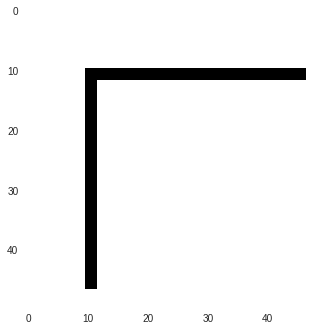

[(10, 10), (10, 11), (10, 12), (10, 13), (10, 14)]

In [45]:
# make shape
shape = np.zeros(gridshape)
shape[L:-3,L:-3] = 1
shape[int(1.25*L):-3,int(1.25*L):-3] = 0 

plt.imshow(shape)
plt.grid(False)
plt.show()

shape_coordinates = []
for x in range(shape.shape[0]):
  for y in range(shape.shape[1]):
    if shape[x,y] == 1:
      shape_coordinates.append((x,y))
shape_coordinates[:5]

In [0]:
# timestep:
# 1. all agents edge-follow one step if able.
# 2. compute_neighbors_and_distances(),
# 3. recompute gradient and estimated coordinates
# (as those which minimize the discrepancy between the observed distances to neighbors
# and the distances calculated using neighbors' estimations of their own coordinates)

In [0]:
# edge-follow

def agent_thinks_its_in_shape(agent):
  if agent['estimated_coordinates'] in shape_coordinates:
    return True
  else:
    return False

def prospective_movement(agent):
  # clockwise edge-following
 

In [0]:
def euclidean_distance(x0,x1):
  return sum((np.array(x0)-np.array(x1))**2)**.5

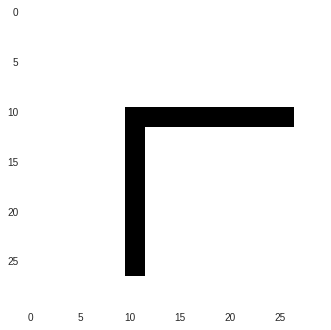